In [34]:
# importing neccasary libraries
import pandas as pd 
import numpy as np 
import sklearn
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report,confusion_matrix


In [6]:
# Read the data
df = pd.read_csv("User_Data.csv")

In [7]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df.shape

(400, 5)

In [11]:
#
#Extracting Independent and dependent Variable  
x= df.iloc[:, [2,3]].values  
y= df.iloc[:, 4].values  

In [15]:
#
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [20]:
#
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
x_train,x_test

(array([[ 0.58164944, -0.88670699],
        [-0.60673761,  1.46173768],
        [-0.01254409, -0.5677824 ],
        [-0.60673761,  1.89663484],
        [ 1.37390747, -1.40858358],
        [ 1.47293972,  0.99784738],
        [ 0.08648817, -0.79972756],
        [-0.01254409, -0.24885782],
        [-0.21060859, -0.5677824 ],
        [-0.21060859, -0.19087153],
        [-0.30964085, -1.29261101],
        [-0.30964085, -0.5677824 ],
        [ 0.38358493,  0.09905991],
        [ 0.8787462 , -0.59677555],
        [ 2.06713324, -1.17663843],
        [ 1.07681071, -0.13288524],
        [ 0.68068169,  1.78066227],
        [-0.70576986,  0.56295021],
        [ 0.77971394,  0.35999821],
        [ 0.8787462 , -0.53878926],
        [-1.20093113, -1.58254245],
        [ 2.1661655 ,  0.93986109],
        [-0.01254409,  1.22979253],
        [ 0.18552042,  1.08482681],
        [ 0.38358493, -0.48080297],
        [-0.30964085, -0.30684411],
        [ 0.97777845, -0.8287207 ],
        [ 0.97777845,  1.867

In [21]:
# 
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  
# n-neighbours : usually k always greater , I choose 5 
# metric='minkowski': This is the default parameter and it decides the distance between the points.
# p = 2 ; it is euclidean formula

KNeighborsClassifier()

In [23]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)

In [26]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)
#

[[64  4]
 [ 3 29]]


In [35]:

# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
for i in range(5,38):
    n = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    print('WITH K=',i)
    print('\n')
    print(confusion_matrix(y_test,pred))
    print('\n')
    print(classification_report(y_test,pred))

WITH K= 5


[[64  4]
 [ 4 28]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100

WITH K= 6


[[64  4]
 [ 4 28]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100

WITH K= 7


[[64  4]
 [ 4 28]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      

WITH K= 36


[[64  4]
 [ 4 28]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100

WITH K= 37


[[64  4]
 [ 4 28]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



In [ ]:
# We Find this result are same any k value and metrics is also good performing 

In [28]:
# How we choose best k value
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

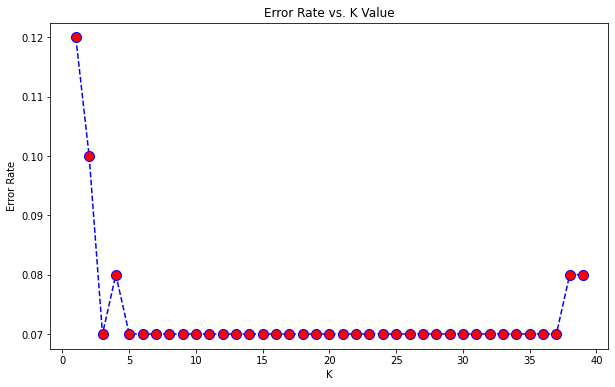

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# With this 
# We understand we can choose any value of k 5,6,7... till the 37 it will best work with this k values 

In [ ]:
# Conc:

# We understand k nearest neighbours is good for classification 
# And it really good to find similarity euclidean , manhattam these two metrics will find the distance bw point 
# And it good image segementation